In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
mean_01 = np.array([0.1, 0.2])
mean_02 = np.array([3.1, 3.2])

cov_01 = np.array([[1.0, 0.2],[0.2, 2.1]])
cov_02 = np.array([[2.0, 1.3],[1.3, 1.1]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape
print dist_02.shape

(500, 2)
(500, 2)


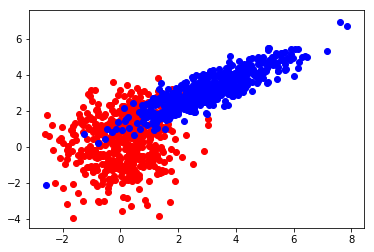

In [9]:
plt.scatter(dist_01[:, 0], dist_01[:, 1], c='r')
plt.scatter(dist_02[:, 0], dist_02[:, 1], c='b')

plt.show()

In [10]:
## Total Dataset
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows, cols))
print data.shape

data[:dist_01.shape[0], :dist_01.shape[1]] = dist_01
data[dist_01.shape[0]: rows, :dist_01.shape[1]] = dist_02
data[dist_01.shape[0]: rows, -1] = 1.0

(1000, 3)


In [11]:
np.random.shuffle(data)

data[:10]

array([[ 0.13164019,  1.45286909,  0.        ],
       [ 3.56736756,  3.81853182,  1.        ],
       [-0.47538667, -1.12127998,  0.        ],
       [ 2.77069682,  3.54452259,  1.        ],
       [-0.53643068,  1.81318467,  0.        ],
       [ 0.34339256,  0.74163553,  0.        ],
       [ 3.22129969,  3.59191044,  1.        ],
       [ 2.48695328,  2.57990521,  1.        ],
       [ 1.20405078,  0.11112311,  0.        ],
       [-1.67189165, -0.19938985,  0.        ]])

In [12]:
## Data Splitting
split = int(0.75*data.shape[0])
X_train = data[:split, :-1]
Y_train = data[:split, -1]

X_test = data[split:, :-1]
Y_test = data[split:, -1]

print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(750, 2)
(250, 2)
(750,)
(250,)


In [7]:
'''Functions'''
def sigmoid(z):
    sig = 1.0/(1 + np.exp(-1*z))
    return sig

def hypothesis(x_sample, w, b):
    h = (x_sample*w).sum() + b
    return sigmoid(h)
    
def get_error(x, w, y_true, b):
    err = 0.0
    m = x.shape[0]
    
    for ix in range(m):
        if y_true[ix] == 0:
            #print hypothesis(x[ix], w, b)
            add_term = -1*(np.log(1 - hypothesis(x[ix], w, b)))
            err += add_term
        else:
            add_term = -1*(np.log(hypothesis(x[ix], w, b)))
            err += add_term
    
    err = err/m
    return err

In [8]:
def get_gradients(x, w, y_true, b):
    
    grad_w = np.zeros(w.shape[0])
    grad_b = 0
    
    m = x.shape[0]
    for ix in range(m):
        grad_w += (hypothesis(x[ix], w, b) - y_true[ix])*(x[ix])
        grad_b += (hypothesis(x[ix], w, b) - y_true[ix])*(1)
    
    return [grad_w, grad_b]

In [9]:
def optimizer(x, w, y_true, b, learning_rate=0.001):
    error = get_error(x, w, y_true, b)
    
    [grad_w, grad_b] = get_gradients(x, w, y_true, b)
    
    b = b - learning_rate*grad_b
    w = w - learning_rate*grad_w
    
    return error, w, b

In [11]:
def Logistic_Regression(X_train, Y_train, nb_epochs=100, 
                        learning_rate=0.0001):
    
    loss = []
    
    ## Parameter Initialisation
    W = np.array([0.3, 0.2])
    b = 3.6
    
    for ix in range(nb_epochs):
        error, W, b = optimizer(X_train, W, Y_train, b, learning_rate)
        loss.append(error)
        
    W_final = W
    b_final = b
    
    return loss, W_final, b_final

In [12]:
loss_logs, W_final, b_final = Logistic_Regression(X_train, Y_train)

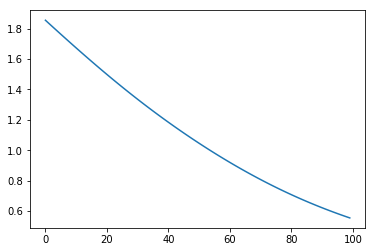

In [13]:
plt.plot(loss_logs)
plt.show()

In [13]:
print W_final
print b_final

[ 0.46283625  0.39623477]
-1.03941747117


In [16]:
W = np.array([0.3, 0.2])
b = 3.6

In [14]:
from sklearn.linear_model import LogisticRegression

In [20]:
LogisticRegression?

In [15]:
lr = LogisticRegression()

lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
lr.score(X_test, Y_test)

0.91200000000000003